In [3]:
#!pip3 install sklearn

In [4]:
from sklearn import preprocessing

In [5]:
le_cities = preprocessing.LabelEncoder()
le_cities.fit(['paris', 'paris', 'tokyo', 'amsterdam'])

LabelEncoder()

In [6]:
list(le_cities.classes_)

['amsterdam', 'paris', 'tokyo']

In [7]:
list(le_cities.transform(['tokyo', 'tokyo', 'paris']))

[2, 2, 1]

In [8]:
list(le_cities.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [9]:
le_colours = preprocessing.LabelEncoder()
le_colours.fit(['blue', 'white', 'red'])

LabelEncoder()

In [10]:
list(le_colours.classes_)

['blue', 'red', 'white']

In [11]:
list(le_colours.transform(['blue']))

[0]

In [12]:
list(le_colours.inverse_transform([0]))

['blue']

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
golf_data = pd.read_csv('golf_dataset.csv')

In [15]:
golf_data.head()

,outlook,temp,temperature,hum,humidity,windy,play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes


In [16]:
golf_data.tail()

,outlook,temp,temperature,hum,humidity,windy,play
9,sunny,85,hot,85,high,False,no
10,sunny,80,hot,90,high,True,no
11,sunny,72,mild,95,high,False,no
12,sunny,69,cool,70,normal,False,yes
13,sunny,75,mild,70,normal,True,yes


In [17]:
golf_data.shape

(14, 7)

In [18]:
len(golf_data.index)

14

In [19]:
len(golf_data.columns)

7

In [20]:
golf_data

,outlook,temp,temperature,hum,humidity,windy,play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes
5,rainy,68,cool,80,normal,False,yes
6,rainy,65,cool,70,normal,True,no
7,rainy,75,mild,80,normal,False,yes
8,rainy,71,mild,91,high,True,no
9,sunny,85,hot,85,high,False,no


In [22]:
print(golf_data['outlook'].unique())

['overcast' 'rainy' 'sunny']


In [24]:
print(golf_data.groupby('outlook').size())

outlook
overcast    4
rainy       5
sunny       5
dtype: int64


In [27]:
#!pip3 install seaborn

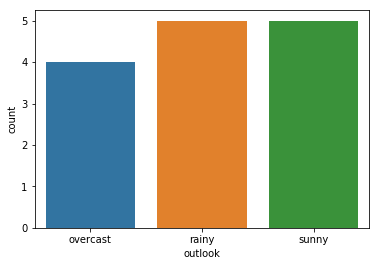

In [29]:
import seaborn as sns
sns.countplot(golf_data['outlook'], label='count')
plt.show()

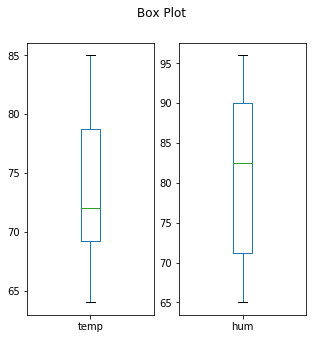

In [30]:
golf_data.plot(kind='box', subplots=True,
              layout=(1,2), sharex=False, sharey=False,
              figsize=(5,5), title='Box Plot')
plt.show()

In [31]:
le_outlook = preprocessing.LabelEncoder()
le_outlook.fit(golf_data['outlook'].unique())

LabelEncoder()

In [32]:
list(le_outlook.classes_)

['overcast', 'rainy', 'sunny']

In [33]:
le_temp = preprocessing.LabelEncoder()
le_temp.fit(golf_data['temperature'].unique())
list(le_temp.classes_)

['cool', 'hot', 'mild']

In [34]:
le_hum = preprocessing.LabelEncoder()
le_hum.fit(golf_data['humidity'].unique())
list(le_hum.classes_)

['high', 'normal']

In [35]:
le_windy = preprocessing.LabelEncoder()
le_windy.fit(golf_data['windy'].unique())
list(le_windy.classes_)

[False, True]

In [36]:
le_play = preprocessing.LabelEncoder()
le_play.fit(golf_data['play'].unique())
list(le_play.classes_)

['no', 'yes']

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
le_golf_data = pd.DataFrame()
le_golf_data

""


In [39]:
le_outlook.transform(golf_data['outlook'])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [40]:
le_golf_data['outlook'] = le_outlook.transform(golf_data['outlook'])
le_golf_data

,outlook
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,2


In [42]:
le_golf_data['temperature'] = le_temp.transform(golf_data['temperature'])
le_golf_data['humidity'] = le_hum.transform(golf_data['humidity'])
le_golf_data['windy'] = le_windy.transform(golf_data['windy'])
le_golf_data['play'] = le_play.transform(golf_data['play'])
le_golf_data

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [43]:
features = ['outlook', 'temperature', 'humidity', 'windy']
features

['outlook', 'temperature', 'humidity', 'windy']

In [44]:
golf_data[features]

,outlook,temperature,humidity,windy
0,overcast,hot,high,False
1,overcast,cool,normal,True
2,overcast,mild,high,True
3,overcast,hot,normal,False
4,rainy,mild,high,False
5,rainy,cool,normal,False
6,rainy,cool,normal,True
7,rainy,mild,normal,False
8,rainy,mild,high,True
9,sunny,hot,high,False


In [47]:
le_golf_data[features]

,outlook,temperature,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [48]:
target = 'play'
le_golf_data[target]

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int32

In [49]:
model = GaussianNB()
model.fit(le_golf_data[features], le_golf_data[target])

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
# test outlook=sunny, temperature=cool, humidity=high, windy=True
a = list(le_outlook.transform(['sunny']))
a.extend(list(le_temp.transform(['cool'])))
a.extend(list(le_hum.transform(['high'])))
a.extend(list(le_windy.transform([True])))
a

[2, 0, 0, 1]

In [56]:
print(model.predict([a]))

[0]


In [59]:
accuracy = accuracy_score([0], model.predict([a]))
accuracy

1.0

In [60]:
# test outlook=sunny, temperature=cool, humidity=high, windy=True
a = list(le_outlook.transform(['sunny']))
a.extend(list(le_temp.transform(['hot'])))
a.extend(list(le_hum.transform(['normal'])))
a.extend(list(le_windy.transform([False])))
a

[2, 1, 1, 0]

In [61]:
print(model.predict([a]))

[1]


In [62]:
accuracy = accuracy_score([1], model.predict([a]))
accuracy

1.0